Infos
source data: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

resume:
The file "sonar.mines" contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions.  The file "sonar.rocks" contains 97 patterns obtained from rocks under similar conditions.  The transmitted sonar signal is a frequency-modulated chirp, rising in frequency.  The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0.  Each number represents the energy within a particular frequency band, integrated over a certain period of time.  The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder).  The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [56]:
df = pd.read_csv('sonar.all-data.csv')

In [57]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


/////////////////////////////////////////////////////////////////////////////////

<AxesSubplot:>

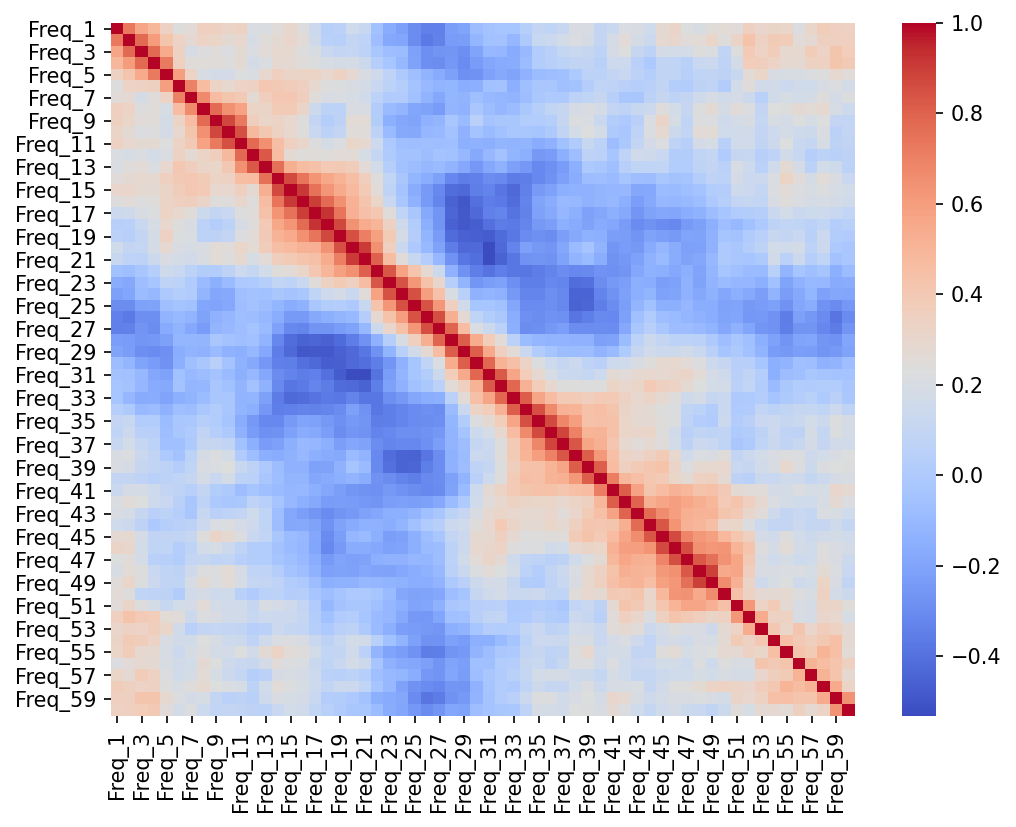

In [58]:
plt.figure(figsize=(8,6),dpi=150)
sns.heatmap(df.corr(),cmap='coolwarm')

In [59]:
df['Target'] = df['Label'].map({'R':0,'M':1})

In [60]:
np.abs(df.corr()['Target']).sort_values().tail(6)

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

///////////////////////////////////////////////////////////////////////////////

In [61]:
print("class distr:")
print(df['Target'].value_counts(normalize=True))

class distr:
1    0.533654
0    0.466346
Name: Target, dtype: float64


//////////////////////////////////////////////////////////

In [63]:
X = df.drop(['Target','Label'],axis=1)
y = df['Target']

In [64]:
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

//////////////////////////////////////////////////////////////////////////////////////////////////

In [66]:
scaler = StandardScaler()

In [67]:
knn = KNeighborsClassifier()

In [68]:
operations = [('scaler',scaler),('knn',knn)]

In [69]:
from sklearn.pipeline import Pipeline

In [70]:
pipe = Pipeline(operations)

//////////////////////////////////////////////////////////////////////////

In [72]:
k_values = list(range(1,30))

In [73]:
param_grid = {'knn__n_neighbors': k_values}

In [74]:
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [75]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [76]:
full_cv_classifier.fit(X_cv,y_cv)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [77]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [78]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.84438122, 0.82318634, 0.81251778, 0.83385491, 0.77524893,
       0.78605974, 0.76472262, 0.75945946, 0.76500711, 0.78122333,
       0.76486486, 0.74893314, 0.74864865, 0.75405405, 0.74338549,
       0.74893314, 0.73826458, 0.72731152, 0.73826458, 0.72745377,
       0.73812233, 0.73271693, 0.72233286, 0.70056899, 0.71664296,
       0.71123755, 0.71123755, 0.71664296, 0.72204836])

Text(0, 0.5, 'Accuracy/Precisão')

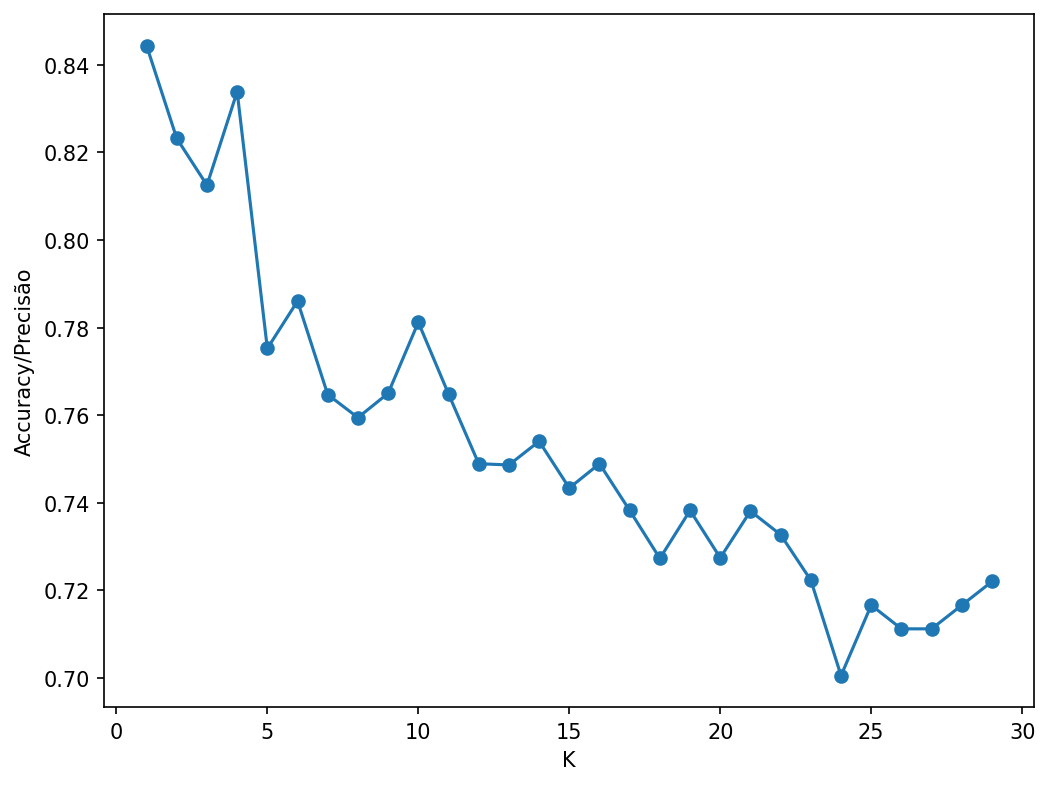

In [79]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.figure(figsize=(8,6),dpi=150)
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy/Precisão")

evaluation test

In [80]:
pred = full_cv_classifier.predict(X_test)

<Figure size 600x400 with 0 Axes>

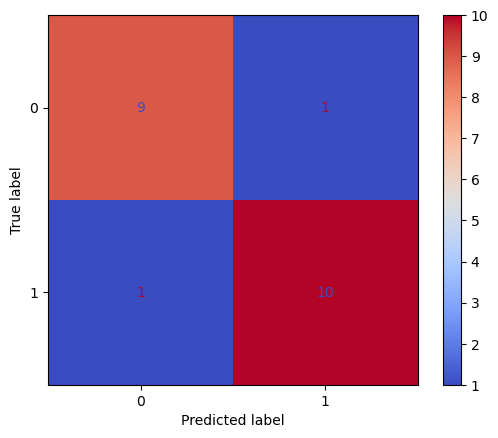

In [84]:
plt.figure(figsize=(6,4))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, pred))
disp.plot(cmap='coolwarm')
plt.show()

In [ ]:
print("Relatório de Classificação:")
print(classification_report(y_test, pred))